In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import missingno as msno

In [2]:
# Load the datasets
df_activity_environment_data = pd.read_csv('data/activity_environment_data.csv')
df_digital_interaction_data = pd.read_csv('data/digital_interaction_data.csv')
df_personal_health_data = pd.read_csv('data/personal_health_data.csv')

In [3]:
df1_users = set(df_activity_environment_data['User_ID'])
df2_users = set(df_digital_interaction_data['User_ID'])
df3_users = set(df_personal_health_data['User_ID'])


# Check if all users in df1 are in df2 and df3
all_users_same = df1_users.issubset(df2_users) and df1_users.issubset(df3_users)

print("All users in dataset 1 are in the other two datasets:", all_users_same)

All users in dataset 1 are in the other two datasets: True


In [4]:
# Merge the datasets on 'User_ID' and 'Timestamp'
df = pd.merge(df_activity_environment_data, df_digital_interaction_data, on=['User_ID', 'Timestamp'], how='outer')
df = pd.merge(df, df_personal_health_data, on=['User_ID', 'Timestamp'], how='outer')

In [5]:
df.head().T.style.set_properties(**{'background-color': 'grey',
                           'color': 'white',
                           'border-color': 'white'})

,0,1,2,3,4
User_ID,U_00001,U_00002,U_00003,U_00004,U_00005
Timestamp,2021-01-01 00:00:00,2021-01-01 01:00:00,2021-01-01 02:00:00,2021-01-01 03:00:00,2021-01-01 04:00:00
Steps,9146,9362,21,13252,21
Calories_Burned,457.300000,468.100000,1.050000,662.600000,1.050000
Distance_Covered,7.316800,7.489600,0.016800,10.601600,0.016800
Exercise_Type,Running,Yoga,Strength Training,nan,Yoga
Exercise_Duration,1.219675,1.378399,0.803857,0.000000,0.807389
Exercise_Intensity,Low,Moderate,Moderate,nan,High
Ambient_Temperature,27.271525,24.430288,29.340574,25.289230,21.853590
Battery_Level,97.338777,66.573240,30.138828,78.838640,17.673261


In [6]:
df.shape

(10000, 40)

In [7]:
# Assuming df is your DataFrame and 'diabetes_event' is your column with diabetes events
total_count = df.shape[0]
diabetes_event_count = df[df['Medical_Conditions'] == "Diabetes"].shape[0]

percentage = (diabetes_event_count / total_count) * 100

print(f"Out of the total {total_count} individuals, {diabetes_event_count} had a diabetes event. This is approximately {percentage:.2f}% of the dataset.")

Out of the total 10000 individuals, 3359 had a diabetes event. This is approximately 33.59% of the dataset.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_ID                 10000 non-null  object 
 1   Timestamp               10000 non-null  object 
 2   Steps                   10000 non-null  int64  
 3   Calories_Burned         10000 non-null  float64
 4   Distance_Covered        10000 non-null  float64
 5   Exercise_Type           7399 non-null   object 
 6   Exercise_Duration       10000 non-null  float64
 7   Exercise_Intensity      7399 non-null   object 
 8   Ambient_Temperature     10000 non-null  float64
 9   Battery_Level           10000 non-null  float64
 10  Altitude                10000 non-null  float64
 11  UV_Exposure             10000 non-null  float64
 12  Notifications_Received  10000 non-null  int64  
 13  Screen_Time             10000 non-null  float64
 14  Age                     10000 non-null 

In [9]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Steps,10000.0,10025.18,5820.39,1.00,4961.75,9962.00,15167.00,20000.00
Calories_Burned,10000.0,501.26,291.02,0.05,248.09,498.10,758.35,1000.00
Distance_Covered,10000.0,8.02,4.66,0.00,3.97,7.97,12.13,16.00
Exercise_Duration,10000.0,0.92,0.66,0.00,0.00,1.00,1.48,2.00
Ambient_Temperature,10000.0,28.11,7.53,15.00,21.48,28.21,34.59,41.00
Battery_Level,10000.0,49.90,29.22,0.02,24.21,49.93,75.38,101.00
Altitude,10000.0,2508.05,1451.11,0.01,1242.65,2498.85,3756.41,4999.65
UV_Exposure,10000.0,4.00,2.31,0.00,2.00,4.03,6.00,8.00
Notifications_Received,10000.0,49.95,28.99,0.00,25.00,50.00,75.00,100.00
Screen_Time,10000.0,4.03,2.29,0.00,2.06,4.02,6.00,8.00


In [10]:
# getting percentage of missing values per feature
df.isna().sum()/len(df)*100

User_ID                    0.00
Timestamp                  0.00
Steps                      0.00
Calories_Burned            0.00
Distance_Covered           0.00
Exercise_Type             26.01
Exercise_Duration          0.00
Exercise_Intensity        26.01
Ambient_Temperature        0.00
Battery_Level              0.00
Altitude                   0.00
UV_Exposure                0.00
Notifications_Received     0.00
Screen_Time                0.00
Age                        0.00
Gender                     0.00
Weight                     0.00
Height                     0.00
Medical_Conditions        33.04
Medication                 0.00
Smoker                     0.00
Alcohol_Consumption       33.60
Day_of_Week                0.00
Sleep_Duration             0.00
Deep_Sleep_Duration        0.00
REM_Sleep_Duration         0.00
Wakeups                    0.00
Snoring                    0.00
Heart_Rate                 0.00
Blood_Oxygen_Level         0.00
ECG                        0.00
Calories

<Axes: >

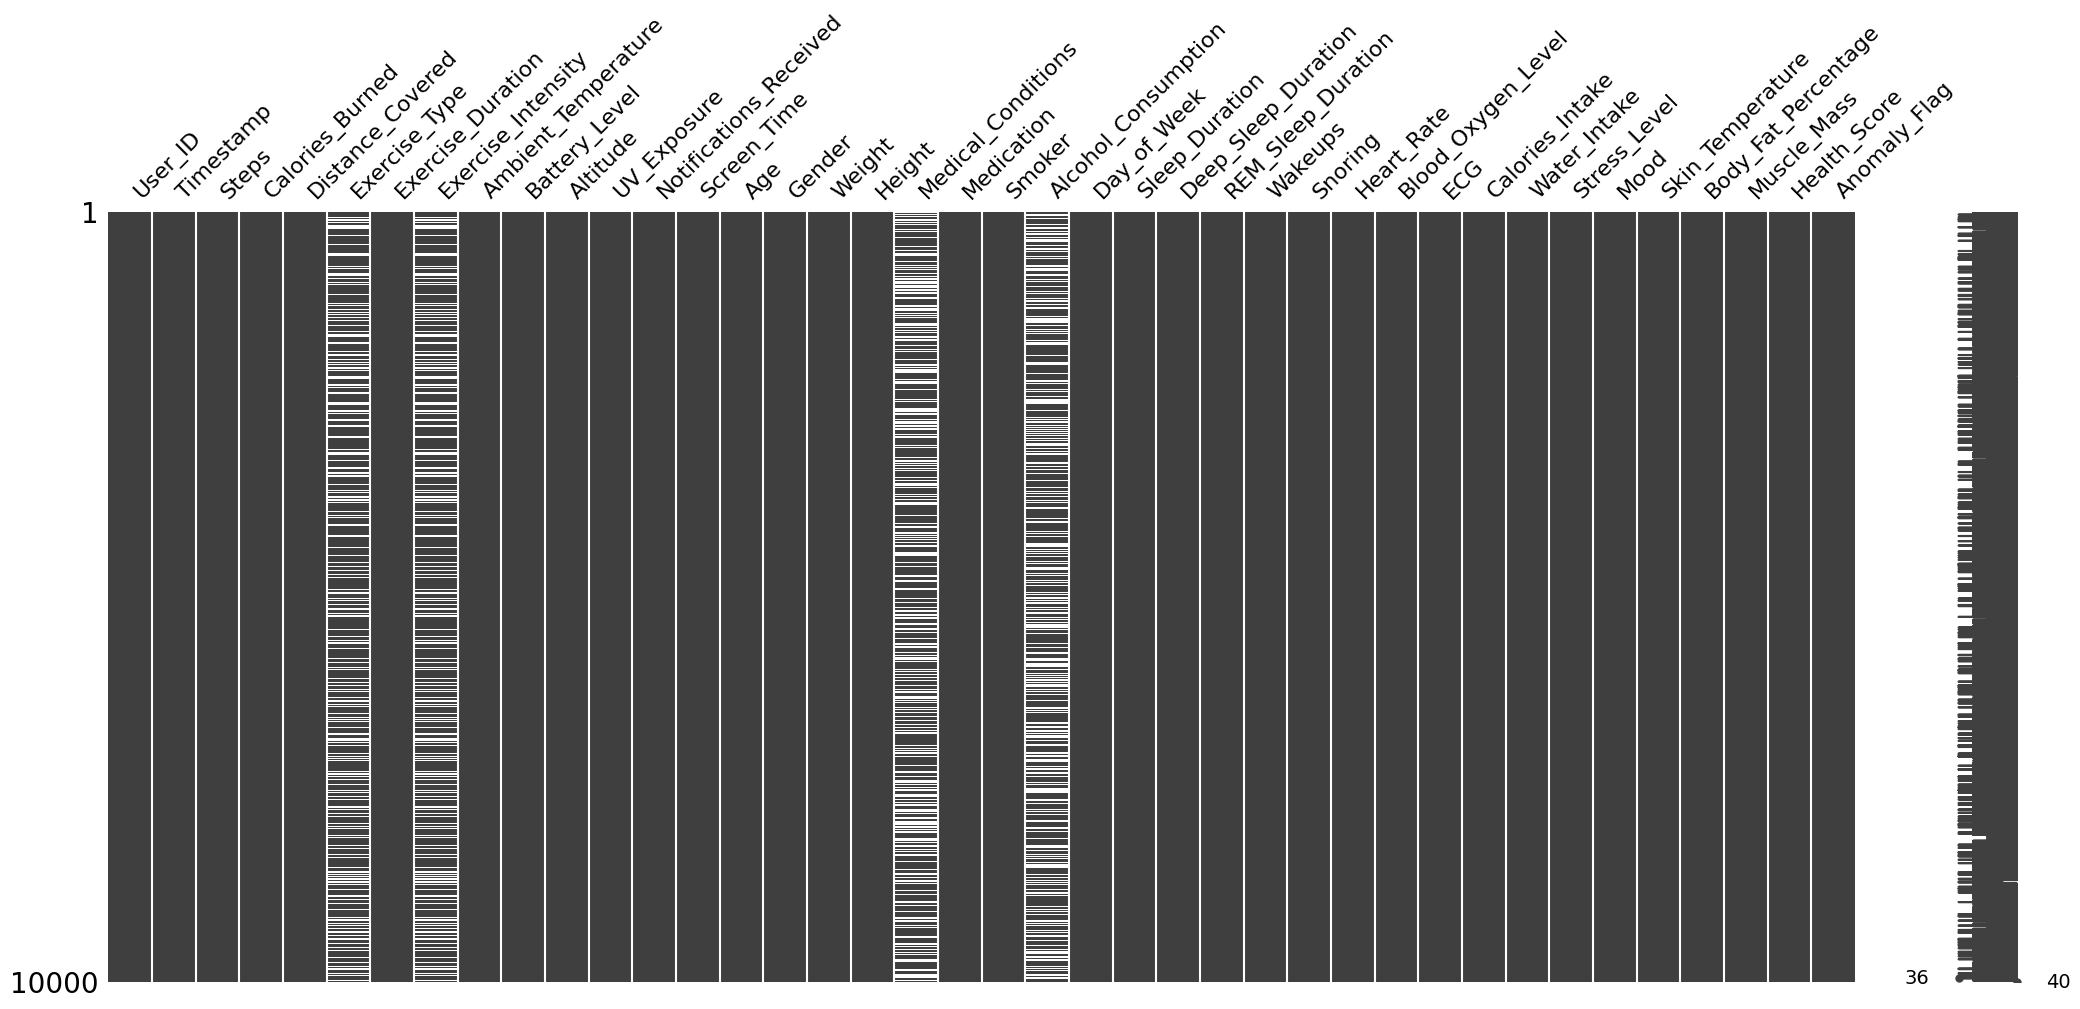

In [11]:
msno.matrix(df)


## Missing value handling


In [12]:
import numpy as np

# Replace 'NA' string values with np.nan to recognize them as NaN values
df.replace('NA', np.nan, inplace=True)

# Create a new column 'nan_count' that contains the count of NaNs per row
df['nan_count'] = df.isna().sum(axis=1)

# Sort the DataFrame based on 'nan_count' in descending order
df = df.sort_values(by='nan_count', ascending=False)
df_not_useable = df[df['nan_count'] >= 12]
df_not_useable.to_csv('data/all_columns_none.csv')
df = df[df['nan_count'] < 12]
df.drop(columns=['nan_count'], inplace=True)

print(f"all columns are none: {df_not_useable.shape[0]}")

all columns are none: 0


In [13]:
df_Exercise_Type_is_none = df[df['Exercise_Type'].isna()] 
df_Exercise_Type_is_none.to_csv('data/df_Exercise_Type_is_none.csv')

df_Exercise_Intensity_is_none = df[df['Exercise_Intensity'].isna()] 
df_Exercise_Intensity_is_none.to_csv('data/df_Exercise_Intensity_is_none.csv')

df_Medical_Conditions_is_none = df[df['Medical_Conditions'].isna()] 
df_Medical_Conditions_is_none.to_csv('data/df_Medical_Conditions_is_none.csv')

df_Alcohol_Consumption_is_none = df[df['Alcohol_Consumption'].isna()] 
df_Alcohol_Consumption_is_none.to_csv('data/df_MAlcohol_Consumption_is_none.csv')

# Remove rows where 'Exercise_Type', 'Exercise_Intensity', 'Medical_Conditions', and 'Alcohol_Consumption' are all null
df = df.dropna(subset=['Exercise_Type', 'Exercise_Intensity', 'Medical_Conditions', 'Alcohol_Consumption'], how='all')



In [14]:
df.shape

(9703, 40)

In [15]:
# Define the value that you want to use for replacement
# In this example, I'm using the mean of the non-null values in each column
exercise_type_replacement = df['Exercise_Type'].mode()[0]
exercise_intensity_replacement = df['Exercise_Intensity'].mode()[0]
medical_conditions_replacement = df['Medical_Conditions'].mode()[0]
alcohol_consumption_replacement = df['Alcohol_Consumption'].mode()[0]

# Replace null values in 'Exercise_Type' column
df['Exercise_Type'].fillna(exercise_type_replacement, inplace=True)

# Replace null values in 'Exercise_Intensity' column
df['Exercise_Intensity'].fillna(exercise_intensity_replacement, inplace=True)

# Replace null values in 'Medical_Conditions' column
df['Medical_Conditions'].fillna(medical_conditions_replacement, inplace=True)

# Replace null values in 'Alcohol_Consumption' column
df['Alcohol_Consumption'].fillna(alcohol_consumption_replacement, inplace=True)


In [16]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Analysis")

profile.to_file("analysis.html")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Summarize dataset:  89%|████████▉ | 42/47 [00:00<00:00, 67.82it/s, Calculate auto correlation]             /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Moderate'')
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 75.81i

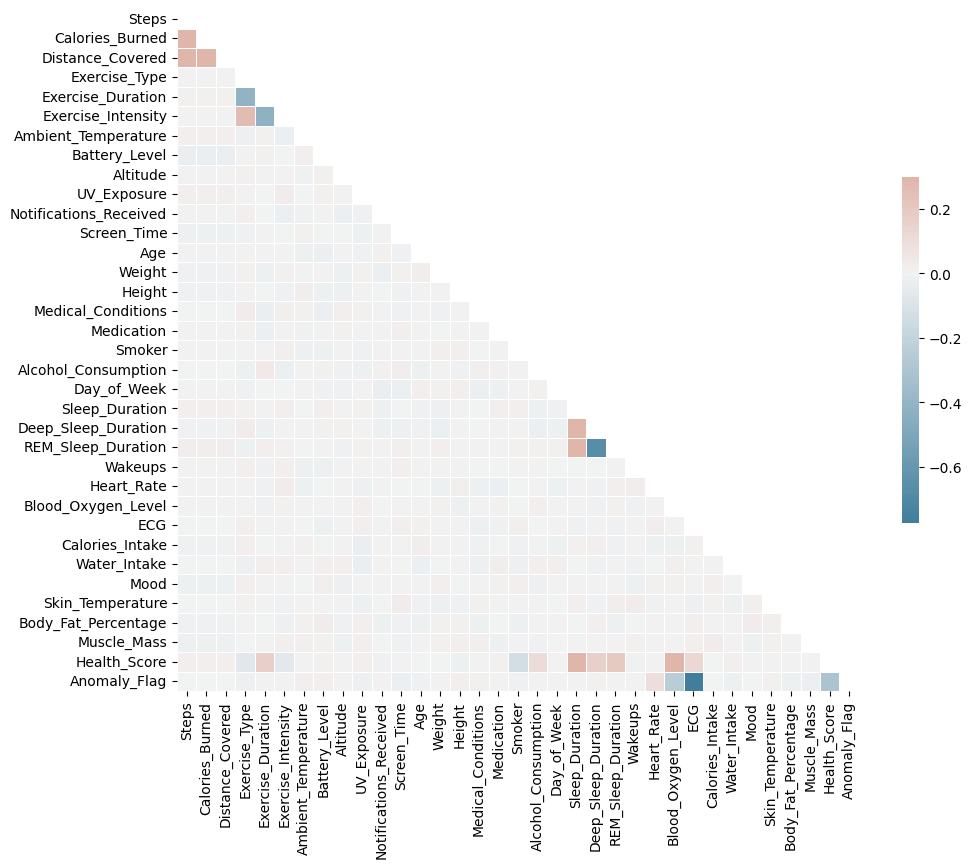

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_cols.corr()


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

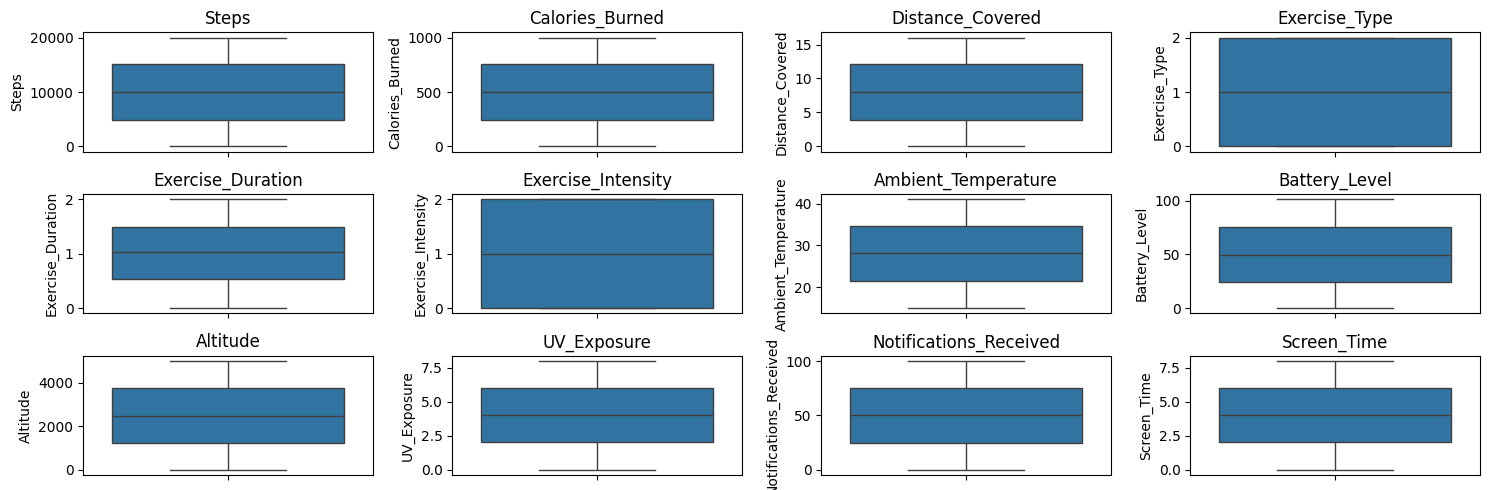

In [20]:
#exploratory data analysis_outliers
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 5))
axes = axes.ravel()
cols = df.columns[2:]

for col, ax in zip(cols, axes):
    sns.boxplot(data=df, y=col, ax=ax)
    ax.set(title=f'{col}', xlabel=None)
fig.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Convert 'Timestamp' to Unix time
df['Timestamp'] = (df['Timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Create a label encoder object
le = LabelEncoder()

# List of categorical columns to be label encoded
label_cols = ['Exercise_Type', 'Exercise_Intensity', 'Medical_Conditions', 'Medication', 'Smoker', 'Alcohol_Consumption', 'Day_of_Week', 'Mood', 'ECG', 'Anomaly_Flag']

# Apply label encoding on categorical columns
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# List of categorical columns to be one-hot encoded
onehot_cols = ['Gender']

# Apply one-hot encoding on categorical columns
df = pd.get_dummies(df, columns=onehot_cols)

# Define your features and target variable
X = df.drop(['User_ID', 'Medical_Conditions'], axis=1)
y = df['Medical_Conditions']

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()
